# Linear Programming
$\text{Genrael form}$
$$\text{find } x \text{ which minimizes } c^Tx$$
$\text{subject to}$
$$Ax \leq b \text{ or } Ax=b$$
$$x \geq 0$$

# Linear Regression using LP

We can reolve the linear regression using linear progamming for below cases

(1) if we want to minimizes the <b>sum</b> of the absolute error of data from the line
$$\text{objective function} = \sum^n_{i=1} |y_i - (a_1x_i + a_0)|$$

(2) if we want to minimizes the <b>max</b> of the absolute error of data from the line
$$\text{objective function} = \max_i |y_i - (a_1x_i + a_0)|$$ 

However, we cannot apply LP to mean squared error, as this is not a linear problem anymore

Difficulty here lies in the fact that the optimization problem initially is not linear, as this involve absolute value or maximum function. <b>We need to reformulate these using simple tricks that make the problem linear</b>

# Sum of Absolute Error

The problem now
$$\text{Let }\epsilon_i = y_i - a_1x_i - a_0$$
$$\min_{a} \sum^n_{i=1} |\epsilon_i|$$
$$\text{subject to } y_i = a_ix_i+a_0 + \epsilon_i$$

The problem involves nonlinear function (absolute function), we need to transform it into a linear problem by

<b>(1) The absolute error can be deomposed into</b>
$$\epsilon_i = +\epsilon_i \text{ if } \epsilon_i \geq 0$$
$$\epsilon_i = -\epsilon_i \text{ if } \epsilon_i \leq 0$$

<b>(2) Redefining the $\epsilon_i$</b>
$$\epsilon_i = \epsilon_i^+ - \epsilon_i^- \text{ where } \epsilon_i^+ , \epsilon_i^- \geq 0$$

$\epsilon_i^+$ is positive part of the error whereas $\epsilon_i^-$ is negative part of the errors, both are positive numbers

e.g. if $\epsilon_i=-10$, then $\epsilon_i^+ = 0$ and $\epsilon_i^- = 10$

<b>(3) Therefore, we have a linear objective function that</b>
$$\sum^n_{i=1} \epsilon_i^+ + \epsilon_i^-$$
$$\text{subject to } y_i = a_ix_i+a_0 + (\epsilon_i^+ - \epsilon_i^-)$$

<b>(4) However, the standard LPP requires $a_0$ and $a_1$ to be positive, but they should be free variables which could be any real numbers. So we can do the same trick as we did on $\epsilon_i$ to break $a$ into $a^+$ and $a^-$, therefore, the stardard LLP is</b>

$$\min_{a} \sum^n_{i=1} \epsilon_i^+ + \epsilon_i^-$$
$$\text{subject to } y_i = (a_1^+ - a_1^-)x_i+(a_0^+ - a_0^-) + (\epsilon_i^+ - \epsilon_i^-)$$

Once we have above LP problem, we need to think about how to fit into standard LPP, i.e. $c^Tx$ and $Ax=b$


$$\text{Let }x = [a_1^+, a_1^-, a_0^+, a_0^-, \epsilon_1^+, \epsilon_1^-, \epsilon_2^+, \epsilon_2^-, \epsilon_3^+, \epsilon_3^-......]$$
$$c = [0,0,0,0,1,1,1,1,1,1......]$$
$$A_{1n} = [x_1, -x_1, 1, -1, 1, -1, 0, 0, 0, 0......]$$
$$A_{2n} = [x_2, -x_2, 1, -1, 0, 0, 1, -1, 0, 0......]$$
$$A_{3n} = [x_3, -x_3, 1, -1, 0, 0, 0, 0, 1, -1......]$$
$$b = y_i$$

Then, we will have
$$c^Tx = [0,0,0,0,1,1,1,1,1,1......] * [a_1^+, a_1^-, a_0^+, a_0^-, \epsilon_1^+, \epsilon_1^-, \epsilon_2^+, \epsilon_2^-, \epsilon_3^+, \epsilon_3^-......] = \sum^n_{i=1} \epsilon_i^+ + \epsilon_i^-$$
$$A_{1n}x = [x_1, -x_1, 1, -1, 1, -1, 0, 0, 0, 0......] * [a_1^+, a_1^-, a_0^+, a_0^-, \epsilon_1^+, \epsilon_1^-, \epsilon_2^+, \epsilon_2^-, \epsilon_3^+, \epsilon_3^-......] = (a_1^+ - a_1^-)x_1 + (a_0^+ - a_0^-) + (\epsilon_1^+ - \epsilon_1^-) = y_1$$
$$A_{2n}x = [x_2, -x_2, 1, -1, 0, 0, 1, -1, 0, 0......] * [a_1^+, a_1^-, a_0^+, a_0^-, \epsilon_1^+, \epsilon_1^-, \epsilon_2^+, \epsilon_2^-, \epsilon_3^+, \epsilon_3^-......] = (a_1^+ - a_1^-)x_2 + (a_0^+ - a_0^-) + (\epsilon_2^+ - \epsilon_2^-) = y_2$$
$$A_{3n}x = [x_3, -x_3, 1, -1, 0, 0, 0, 0, 1, -1......] * [a_1^+, a_1^-, a_0^+, a_0^-, \epsilon_1^+, \epsilon_1^-, \epsilon_2^+, \epsilon_2^-, \epsilon_3^+, \epsilon_3^-......] = (a_1^+ - a_1^-)x_3 + (a_0^+ - a_0^-) + (\epsilon_3^+ - \epsilon_3^-) = y_3$$

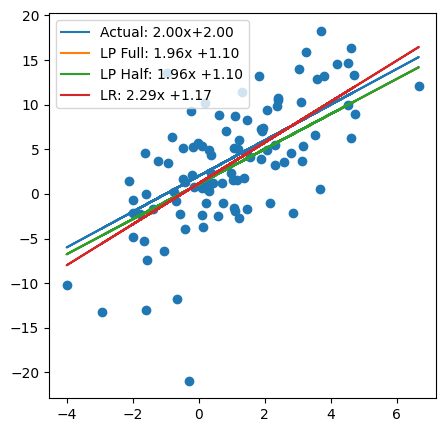

In [1114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn.linear_model import LinearRegression

# Define the actual lines to estimate, and add some noise to simulate the observations
n = 100
a_1 = 2
a_0 = 2

x = np.random.normal(1,2,n)
y = a_1 * x + a_0
y_obs = y + np.random.normal(0,5,n)

# LP with split for a_0 and a_1, this will work for whatever values a
b_eq = y_obs
A_eq = np.zeros((n, 4+n*2))
for i in range(n):
    A_eq[i][0] = x[i]
    A_eq[i][1] = -x[i]
    A_eq[i][2] = 1
    A_eq[i][3] = -1
    A_eq[i][4 + 2*i] = 1
    A_eq[i][4 + 2*i + 1] = -1
c = [0,0,0,0] + [1,1] * n

res = linprog(c=c, A_eq=A_eq, b_eq=b_eq)
a_1_hat_full = res.x[0] - res.x[1]
a_0_hat_full = res.x[2] - res.x[3]
y_hat_lp_full = a_1_hat_full * x + a_0_hat_full

# LP but not split for a_0 and a_1, this will not work when actual a are negative values
b_eq = y_obs
A_eq = np.zeros((n, 2+n*2))
for i in range(n):
    A_eq[i][0] = x[i]     
    A_eq[i][1] = 1    
    A_eq[i][2 + 2*i] = 1
    A_eq[i][2 + 2*i + 1] = -1
c = [0,0] + [1,1] * n
res = linprog(c=c, A_eq=A_eq, b_eq=b_eq)
a_1_hat_half = res.x[0] 
a_0_hat_half = res.x[1]
y_hat_lp_half = a_1_hat_half * x + a_0_hat_half

# compare with actual linear regression models
model = LinearRegression()
X = [[x] for x in x]
model.fit(X,y_obs)
lr_coe = model.coef_
y_hat_lr = model.coef_[0] * x + model.intercept_

# plot all results
plt.figure(figsize=(5,5))
plt.plot(x,y, label="Actual: {:.2f}x+{:.2f}".format(a_1, a_0))
plt.scatter(x,y_obs)
plt.plot(x,y_hat_lp_full, label="LP Full: {:.2f}x +{:.2f}".format(a_1_hat_full, a_0_hat_full))
plt.plot(x,y_hat_lp_half, label="LP Half: {:.2f}x +{:.2f}".format(a_1_hat_half, a_0_hat_half))
plt.plot(x,y_hat_lr, label="LR: {:.2f}x +{:.2f}".format(model.coef_[0], model.intercept_))
plt.legend(loc='upper left')
plt.show()

# Sum of Absolute Error (Alternative)
$$\text{objective function} = \sum^n_{i=1} |y_i - (a_1x_i + a_0)|$$ 
We can tranform into
$$\text{Let } z_i = |y_i - a_1x_i - a_0|$$
$$\text{Minimize } \sum^n_{i=1} z_i$$
$$\text{subject to } z_i = |y_i - a_1x_i - a_0|$$

However, the conditions now is not linear

<b>(1) We can convert the conditions into below, this is because model minimizes each $z_i$, each value will eventually down to $|y_i - a_1x_i - a_0|$</b>
$$z_i \geq |y_i - a_1x_i - a_0|$$

<b>(2) $z_i \geq |y_i - a_1x_i - a_0|$ can be further converted into</b>
$$z_i \geq y_i - (a_1x_i + a_0)$$
$$z_i \geq (a_1x_i + a_0) - y_i$$

e.g. 

if $z = 7 \geq |6-1|$, then it must be $7 \geq 6-1$ and $7 \geq 1-6$

if $z = 7 \geq |1-6|$, then it must be $7 \geq 1-6$ and $7 \geq 6-1$

<b>(3) Reorder the constraints a bit</b>
$$-(a_1x_i + a_0) - z_i \leq - y_i$$
$$(a_1x_i + a_0)  - z_i \leq y_i$$

<b>(4) Given $a_1$ and $a_0$ can be any real numbers, but LP assumes $x>0$ only, we need to convert into $a^+$ and $a^-$</b>
$$-\left((a_1^+ - a_1^-)x_i + (a_0^+ - a_0^-)\right) - z_i \leq - y_i$$
$$ \left((a_1^+ - a_1^-)x_i + (a_0^+ - a_0^-)\right) - z_i \leq y_i$$


Therefore, everything is linear now, we can further tranform it into standard LPP

$$\text{Let } x = [a_1^+, a_1^-, a_0^+, a_0^-, z_1, z_2, z_3, z_4......]$$
$$c = [0,0,0,0,1,1,1......]$$
$$A_{1n} = [-x_1, x_1,-1, 1, -1, 0, 0 ,0 ......]$$
$$A_{2n} = [x_1, -x_1, 1, -1, -1, 0, 0 ,0 ......]$$
$$A_{3n} = [-x_2, x_2,-1, 1, 0, -1, 0 ,0 ......]$$
$$A_{4n} = [x_2, -x_2, 1, -1, 0, -1, 0, 0 ,0 ......]$$
$$b = [-y_1,y_1, -y_2, y_2......]$$

Then, we will have

$$c^Tx = [0,0,1,1,1......] * [a_1, a_0, z_1, z_2, z_3, z_4......] = \sum^n_{i=1} z_i$$
$$A_{1n}x = [-x_1, x_1,-1, 1, -1, 0, 0 ,0 ......] * [a_1^+, a_1^-, a_0^+, a_0^-, z_1, z_2, z_3, z_4......] = -\left((a_1^+ - a_1^-)x_1 + (a_0^+ - a_0^-)\right) - z_i \leq - y_i$$
$$A_{2n}x = [x_1, -x_1, 1, -1, -1, 0, 0 ,0 ......] * [a_1^+, a_1^-, a_0^+, a_0^-, z_1, z_2, z_3, z_4......] = \left((a_1^+ - a_1^-)x_1 + (a_0^+ - a_0^-)\right) - z_i \leq y_i$$



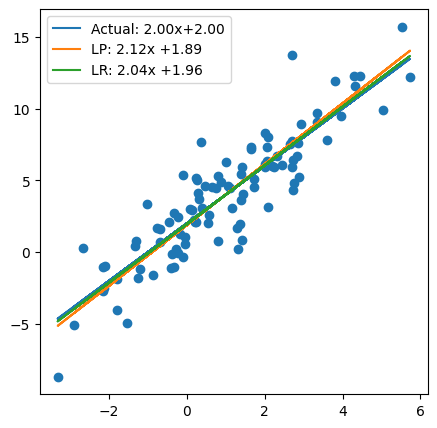

In [1115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn.linear_model import LinearRegression

# Define the actual lines to estimate, and add some noise to simulate the observations
n = 100
a_1 = 2
a_0 = 2

x = np.random.normal(1,2,n)
y = a_1 * x + a_0
y_obs = y + np.random.normal(0,2,n)

b_ub = np.zeros(n*2)
A_ub = np.zeros((n*2, 4+n))
c = np.zeros(4+n)

for i in range(n):
    b_ub[i*2] = -y_obs[i]
    b_ub[i*2+1] = y_obs[i]

    A_ub[i*2][0] = -x[i]
    A_ub[i*2][1] = x[i]
    A_ub[i*2][2] = -1
    A_ub[i*2][3] = 1
    A_ub[i*2][4+i] = -1

    A_ub[i*2+1][0] = x[i]
    A_ub[i*2+1][1] = -x[i]
    A_ub[i*2+1][2] = 1
    A_ub[i*2+1][3] = -1    
    A_ub[i*2+1][4+i] = -1

    c[4+i] = 1

res = linprog(c=c, A_ub=A_ub, b_ub=b_ub)
a_1_hat = res.x[0] - res.x[1] 
a_0_hat = res.x[2] - res.x[3] 
y_hat = a_1_hat * x + a_0_hat

# compare with actual linear regression models
model = LinearRegression()
X = [[x] for x in x]
model.fit(X,y_obs)
lr_coe = model.coef_
y_hat_lr = model.coef_[0] * x + model.intercept_


# plot all results
plt.figure(figsize=(5,5))
plt.plot(x,y, label="Actual: {:.2f}x+{:.2f}".format(a_1, a_0))
plt.scatter(x,y_obs)
plt.plot(x,y_hat, label="LP: {:.2f}x +{:.2f}".format(a_1_hat, a_0_hat))
plt.plot(x,y_hat_lr, label="LR: {:.2f}x +{:.2f}".format(model.coef_[0], model.intercept_))
plt.legend(loc='upper left')
plt.show()

# Max of absoulte error

$$\text{objective function} = \max_i |y_i - (a_1x_i + a_0)|$$ 

We can reformulate the problem by

$$\text{Minimize }z$$
$$\text{subject to } z = \max_i |y_i - (a_1x_i + a_0)|$$

<b>(1) Convert the constraints to below, this is because the z has to be greater than EVERY absolute errors</b>
$$z \geq |y_i - (a_1x_i + a_0)| \text{ for i=0,1,2,3,4}$$

<b>(2) $z \geq |y_i - (a_1x_i + a_0)|$ can be further converted into</b>
$$z \geq y_i - (a_1x_i + a_0)$$
$$z \geq (a_1x_i + a_0) - y_i$$

e.g. 

if $z = 7 \geq |6-1|$, then it must be $7 \geq 6-1$ and $7 \geq 1-6$

if $z = 7 \geq |1-6|$, then it must be $7 \geq 1-6$ and $7 \geq 6-1$

<b>(3) Reorder the constraints a bit</b>
$$-(a_1x_i + a_0) - z \leq - y_i$$
$$(a_1x_i + a_0)  - z \leq y_i$$

<b>(4) Given $a_1$ and $a_0$ can be any real numbers, but LP assumes $x>0$ only, we need to convert into $a^+$ and $a^-$</b>
$$-\left((a_1^+ - a_1^-)x_i + (a_0^+ - a_0^-)\right) - z \leq - y_i$$
$$ \left((a_1^+ - a_1^-)x_i + (a_0^+ - a_0^-)\right) - z \leq y_i$$

Therefore, everything is linear now, we can further tranform it into standard LPP

$$\text{Let } x = [a_1^+, a_1^-, a_0^+, a_0^-, z]$$
$$c = [0,0,0,0,1]$$
$$A_{1n} = [-x_1, x_1,-1, 1, -1]$$
$$A_{2n} = [x_1, -x_1, 1, -1, -1]$$
$$A_{3n} = [-x_2, x_2,-1, 1, -1]$$
$$A_{4n} = [x_2, -x_2, 1, -1, -1]$$
$$b = [-y_1,y_1, -y_2, y_2......]$$

Then, we will have

$$c^Tx = [0,0,0,0,1] * [a_1^+, a_1^-, a_0^+, a_0^-, z] = z$$
$$A_{1n}x = [-x_1, x_1,-1, 1, -1] * [a_1^+, a_1^-, a_0^+, a_0^-, z] = -\left((a_1^+ - a_1^-)x_1 + (a_0^+ - a_0^-)\right) - z \leq - y_i$$
$$A_{2n}x = [x_1, -x_1, 1, -1, -1] * [a_1^+, a_1^-, a_0^+, a_0^-, z] = \left((a_1^+ - a_1^-)x_1 + (a_0^+ - a_0^-)\right) - z \leq y_i$$

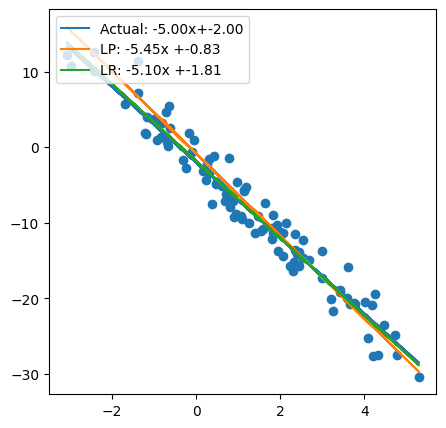

In [1113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn.linear_model import LinearRegression

# Define the actual lines to estimate, and add some noise to simulate the observations
n = 100
a_1 = -5
a_0 = -2

x = np.random.normal(1,2,n)
y = a_1 * x + a_0
y_obs = y + np.random.normal(0,2,n)

b_ub = np.zeros(n*2)
A_ub = np.zeros((n*2, 5))
c = [0,0,0,0,1]

for i in range(n):
    b_ub[i*2] = -y_obs[i]
    b_ub[i*2+1] = y_obs[i]

    A_ub[i*2][0] = -x[i]
    A_ub[i*2][1] = x[i]
    A_ub[i*2][2] = -1
    A_ub[i*2][3] = 1
    A_ub[i*2][4] = -1

    A_ub[i*2+1][0] = x[i]
    A_ub[i*2+1][1] = -x[i]
    A_ub[i*2+1][2] = 1
    A_ub[i*2+1][3] = -1    
    A_ub[i*2+1][4] = -1

res = linprog(c=c, A_ub=A_ub, b_ub=b_ub)
a_1_hat = res.x[0] - res.x[1]
a_0_hat = res.x[2] - res.x[3] 
y_hat = a_1_hat * x + a_0_hat

# compare with actual linear regression models
model = LinearRegression()
X = [[x] for x in x]
model.fit(X,y_obs)
lr_coe = model.coef_
y_hat_lr = model.coef_[0] * x + model.intercept_

# plot all results
plt.figure(figsize=(5,5))
plt.plot(x,y, label="Actual: {:.2f}x+{:.2f}".format(a_1, a_0))
plt.scatter(x,y_obs)
plt.plot(x,y_hat, label="LP: {:.2f}x +{:.2f}".format(a_1_hat, a_0_hat))
plt.plot(x,y_hat_lr, label="LR: {:.2f}x +{:.2f}".format(model.coef_[0], model.intercept_))
plt.legend(loc='upper left')
plt.show()